In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
###import folium
###from folium.plugins import MarkerCluster
###from folium.plugins import FastMarkerCluster

In [2]:
vaccines = pd.read_csv('../data/vaccine_with_protocol.csv')
covid = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')

In [3]:
vaccines.tail()

,vacc_date,zipcode,count_given,dose_nbr,protocol
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot
6693,2021-04-07,NaN,7.0,2.0,two-shot


In [4]:
covid.head()

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [5]:
pd.value_counts(vaccines['protocol'])

two-shot    5960
one-shot     734
Name: protocol, dtype: int64

In [6]:
###how many dates of vaccinations there have been
vacc_occurences = pd.value_counts(vaccines['zipcode'])
vacc_occurences = vacc_occurences.reset_index()

In [7]:
###How many dates of positive tests have there been 
covid_dates = pd.value_counts(covid['Zip'])
covid_dates = covid_dates.reset_index()

In [8]:
vac_per_zip = vaccines.groupby('zipcode')['count_given'].sum()
vac_per_zip = vac_per_zip.reset_index()

In [9]:
low_vac = vac_per_zip[vac_per_zip['count_given'] <= 5000]

In [10]:
low_vac

,zipcode,count_given
1,37027.0,506.0
2,37069.0,89.0
5,37080.0,3078.0
8,37189.0,1650.0
9,37201.0,756.0
20,37213.0,102.0
26,37219.0,891.0
29,37228.0,1040.0
30,37238.0,5.0


<AxesSubplot:xlabel='zipcode'>

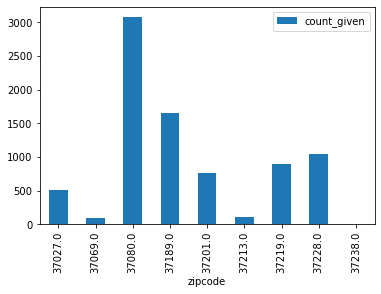

In [11]:
low_vac.plot.bar('zipcode', 'count_given')

In [12]:
high_vac = vac_per_zip[vac_per_zip['count_given'] >= 15000]

<AxesSubplot:xlabel='zipcode'>

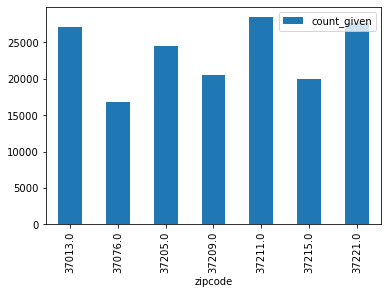

In [13]:
high_vac.plot.bar('zipcode', 'count_given')

Text(0, 0.5, 'Price')

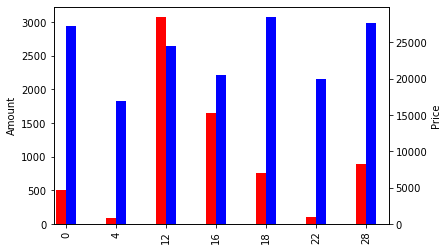

In [14]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .2

low_vac.count_given.plot(kind='bar', color='red', ax=ax, width=width, position=1)
high_vac.count_given.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

In [15]:
covid_dates

,index,Zip
0,37013.0,382
1,37211.0,379
2,37209.0,364
3,37217.0,362
4,37207.0,361
5,37115.0,361
6,37076.0,357
7,37214.0,355
8,37203.0,344
9,37221.0,342


In [16]:
covid_per_zip = covid.groupby('Zip')['Cases'].sum()
covid_per_zip = covid_per_zip.reset_index()

Text(0, 0.5, 'Price')

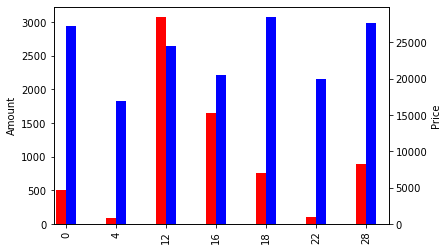

In [17]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .2

low_vac.count_given.plot(kind='bar', color='red', ax=ax, width=width, position=1)
high_vac.count_given.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

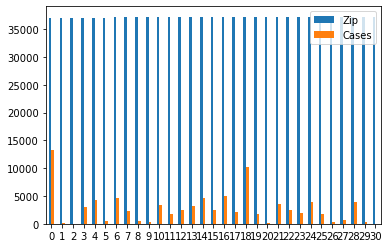

In [18]:
covid_per_zip.plot( kind= 'bar' , secondary_y= 'amount' , rot= 0 )
plt.show()

In [19]:
covid_per_zip = covid_per_zip.rename(columns = {'Zip':'zipcode', 'Cases': 'tot_cases'})

In [20]:
zip_stats = pd.merge(covid_per_zip, vac_per_zip, on = 'zipcode')

<AxesSubplot:xlabel='zipcode'>

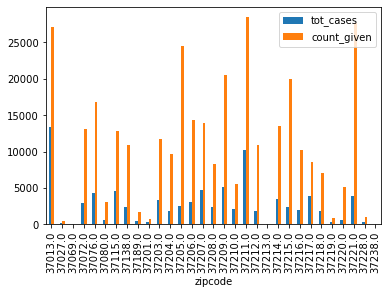

In [21]:
zip_stats.plot(x="zipcode", y=["tot_cases", "count_given"], kind="bar")

In [22]:
###prepping data for heatmap - changing names to match geojson file
zip_stats = zip_stats.rename(columns = {'zipcode':'zip', 'count_given': 'vacc_count'})

In [23]:
###Converting 'zip' to string to make it legible for GeoJson file
zip_stats['zip'] = zip_stats['zip'].astype(int)
zip_stats['zip'] = zip_stats['zip'].astype(str)

## Playing with Geospatial stuff

In [24]:
###Checking Individuals Ones
vaccines.loc[vaccines['zipcode'] == 37027.0, 'count_given'].sum()

506.0

In [25]:
###Playing with GeoSpatial Info
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [29]:
stat_map = pd.merge(zipcodes, zip_stats, on = 'zip')

<AxesSubplot:>

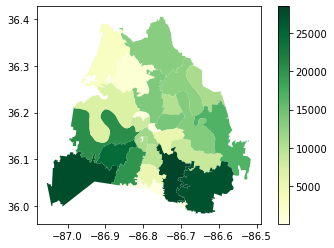

In [42]:
###vaccines by amount
stat_map.plot(column = 'vacc_count', cmap = 'YlGn', legend = True)